# Refinements - Improved MNIST Classifer

Make Your First GAN With PyTorch, 2020

In [1]:
from rich import print

## import libraries

In [2]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt

import mnist_data

## Load Data

In [3]:
train_csv = mnist_data.datadir.joinpath('mnist_train.csv')
mnist_dataset = mnist_data.MnistDataset(train_csv)

## Neural Network Class

In [4]:
from mnist_classifier import Classifier

## Create and refine neural network

In [5]:
# use better activation function
new_model = nn.Sequential(
    nn.Linear(784, 200),
    # nn.Sigmoid(),
    nn.LeakyReLU(0.02),

    nn.LayerNorm(200),

    nn.Linear(200, 10),
    nn.Sigmoid()
    # nn.LeakyReLU(0.02)
)

C = Classifier(model=new_model)  

# binary cross entropy loss works better for classification task
C.loss_function = nn.BCELoss()

# Adam is better than SGD
C.optimiser = torch.optim.Adam(C.parameters())

# move neural network to the GPU
if mnist_dataset.device.type == 'cuda':
    print('Move neural network to GPU')
    C.cuda()

## Train Neural Network

In [6]:
%%time 

# train network on MNIST data set

epochs = 5

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor, print_counter=True)

training epoch 1 of 5

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

training epoch 2 of 5

counter =  70000

counter =  80000

counter =  90000

counter =  100000

counter =  110000

counter =  120000

training epoch 3 of 5

counter =  130000

counter =  140000

counter =  150000

counter =  160000

counter =  170000

counter =  180000

training epoch 4 of 5

counter =  190000

counter =  200000

counter =  210000

counter =  220000

counter =  230000

counter =  240000

training epoch 5 of 5

counter =  250000

counter =  260000

counter =  270000

counter =  280000

counter =  290000

counter =  300000

CPU times: user 2h 24min 6s, sys: 1h 31min 50s, total: 3h 55min 56s
Wall time: 12min 15s


## Plot classifier error

<Figure size 1152x576 with 1 Axes>

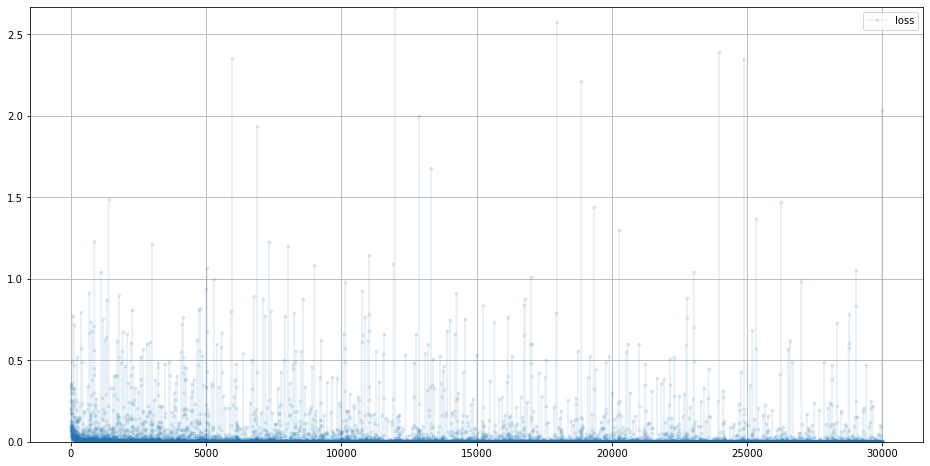

In [13]:
C.plot_progress()

## Classification Example

### load MNIST test data

In [14]:
test_csv = mnist_data.datadir.joinpath("mnist_test.csv")
mnist_test_dataset = mnist_data.MnistDataset(test_csv)

### pick a record

<Figure size 432x288 with 1 Axes>

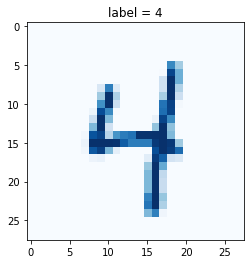

In [15]:
record = 19

# plot image and correct label
mnist_test_dataset.plot_image(record)

### visualise the answer given by the neural network

<AxesSubplot:>

<Figure size 432x288 with 1 Axes>

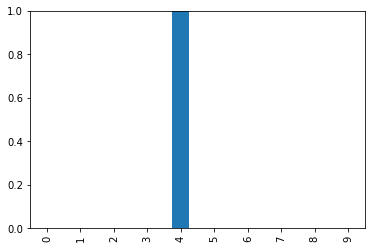

In [16]:
image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data)

if mnist_dataset.device.type == 'cuda':
    output = output.cpu()
    
# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

## Classifier Performance

In [17]:
# test trained neural network on training data

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor)
    if mnist_test_dataset.device.type == 'cuda':
        answer = answer.cpu()
    if (answer.detach().numpy().argmax() == label):
        score += 1
    items += 1

In [18]:
print(f"{score = }, {items = }, {score/items = }")

score = 9753, items = 10000, score/items = 0.9753